# Final Project Workbook 

Click this [link](#ML_cell) to go straight to training section.

## About
This model attempts to predict the type of physical activity from tri-axial smartphone accelerometer data.
### Input Data  
* "train_time_series.csv": contains raw acc. data with the format "timestamp, UTC time, accuracy, x, y, z"
* "train_labels.csv": contains act. lvls to label model
    * 1 = standing
    * 2 = walking
    * 3 = stairs down
    * 4 = stairs up

Note: the labels are provided for every 10th observation in the time series data.

### Test Data  
The final test for the program is to evaluate "test_time_series.csv". 
* "test_labels.csv" is provided to tell you what stamps need predictions
Note: You need to augment the above file to correspond to the class prediction numbers.

# Initial analysis  
This type of problem will require are classification model utilising supervised learning because: we are required to label a set of data points with one of four activities; and the desired output examples for the model are provided. Some models that may be used includes: kNN, logistic regression, naive bayes, stochastic gradient descent, decision trees, random forrests and SVMs - some of which are more appropriate than others.

# Data inspection 

In [1139]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import datetime
import pickle

In [1102]:
# import data
train_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/d64e74647423e525bbeb13f2884e9cfa/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_labels.csv',index_col=0)
train_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/b98039c3648763aae4f153a6ed32f38b/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_time_series.csv',index_col=0)
test_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/72d5933c310cf5eac3fa3f28b26d9c39/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_labels.csv',index_col=0)
test_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1ca4f3d4976f07b8c4ecf99cf8f7bdbc/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_time_series.csv',index_col=0)

In [1103]:
# remove first entry because doesn't line up with provided labels
train_labels = train_labels.iloc[1:, :]

# inspect data
train_labels.head()

,timestamp,UTC time,label
20599,1565109932090,2019-08-06T16:45:32.090,1
20609,1565109933092,2019-08-06T16:45:33.092,1
20619,1565109934094,2019-08-06T16:45:34.094,1
20629,1565109935097,2019-08-06T16:45:35.097,1
20639,1565109936099,2019-08-06T16:45:36.099,1


In [1104]:
# inspect all of the labels
for i in range(len(train_labels['label'])):
    print(train_labels['label'].iloc[i])

1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4


In [1105]:
# remove first couple entries because doesn't line up with provided labels
train_time_series = train_time_series.iloc[4:,:]

# change UTC time to absoluate value in seconds 
train_time_series['UTC time'] = train_time_series['UTC time'].apply(utc_str_to_timestamp)

# inspect data
train_time_series.head()

,timestamp,UTC time,accuracy,x,y,z
20590,1565109931188,1.565074e+09,unknown,-0.054031,-1.003616,0.126450
20591,1565109931288,1.565074e+09,unknown,-0.010880,-0.967575,0.170898
20592,1565109931388,1.565074e+09,unknown,0.052841,-0.982330,0.235565
20593,1565109931488,1.565074e+09,unknown,0.032974,-1.053207,0.256714
20594,1565109931589,1.565074e+09,unknown,-0.090424,-0.972794,0.356308


In [1106]:
train_time_series.tail()

,timestamp,UTC time,accuracy,x,y,z
24325,1565110305638,1.565074e+09,unknown,0.024384,-0.710709,0.030304
24326,1565110305738,1.565074e+09,unknown,0.487228,-1.099136,-0.015213
24327,1565110305838,1.565074e+09,unknown,0.369446,-0.968506,0.036713
24328,1565110305939,1.565074e+09,unknown,0.167877,-0.802826,0.049805
24329,1565110306039,1.565074e+09,unknown,0.689346,-0.991043,0.034973


In [1107]:
# inspect data
test_labels.head()

,timestamp,UTC time,label
24339,1565110307041,2019-08-06T16:51:47.041,NaN
24349,1565110308043,2019-08-06T16:51:48.043,NaN
24359,1565110309046,2019-08-06T16:51:49.046,NaN
24369,1565110310048,2019-08-06T16:51:50.048,NaN
24379,1565110311050,2019-08-06T16:51:51.050,NaN


In [1112]:
# inspect data
test_time_series['UTC time'] = test_time_series['UTC time'].apply(utc_str_to_timestamp)
test_time_series.head(20)

TypeError: strptime() argument 1 must be str, not float

We can see that accuracy is unknown therefore is not a useful feature to keep.

In [1111]:
train_time_series.pop('accuracy')
test_time_series.pop('accuracy')
train_time_series.pop('timestamp')
test_time_series.pop('timestamp')

KeyError: 'accuracy'

We can see from the head of test_time_series and tail of train_time_series that the readings continue uniformly in time from the train to test data sets. 

# Data Exploration


## Examine accelerometer readings

In [1113]:
# print statistical summary of accelerometer data
train_time_series[['x','y','z']].describe()

,x,y,z
count,3740.000000,3740.000000,3740.000000
mean,0.196076,-1.005272,0.084453
std,0.395832,0.451418,0.350993
min,-1.071152,-3.391312,-1.415390
25%,-0.021275,-1.148426,-0.068581
50%,0.161858,-0.957909,0.052078
75%,0.400959,-0.769619,0.204189
max,2.503098,0.321747,2.587173


On average the x and z axes possess a positive accelation, while the z axis reads a negative value. The mean value for the y acceleration is noticably greater than the other two, while the z axis mean is significanly smaller than the others. 

The standard deviation of the y axis readings is the largest, with the other two comparably similar in magnitude. 

The maximum values of the x and z axis are much greater than the max of the y axis, while the minimum of the y axis accleration is the smallest. 

In [1114]:
# add labels to train_time_series
train = train_time_series.copy()
train['label'] = train_labels['label']

# copy over labels in groups of 10
first_index = train.index[0]
for i in range(int(len(train.index)/10)):
    slice_index = i*10 + first_index
    train.loc[slice_index:slice_index+10,'label'] = train.loc[slice_index+9,'label']

train.head()

,UTC time,x,y,z,label
20590,1.565074e+09,-0.054031,-1.003616,0.126450,1.0
20591,1.565074e+09,-0.010880,-0.967575,0.170898,1.0
20592,1.565074e+09,0.052841,-0.982330,0.235565,1.0
20593,1.565074e+09,0.032974,-1.053207,0.256714,1.0
20594,1.565074e+09,-0.090424,-0.972794,0.356308,1.0


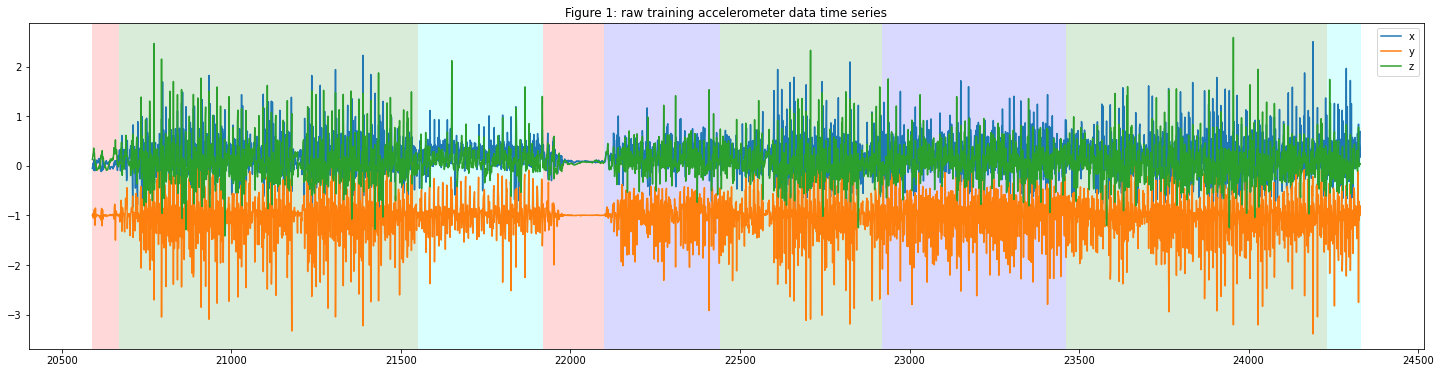

In [891]:
train[['x','y','z']].plot(figsize=(25,6))
plt.title('Figure 1: raw training accelerometer data time series')

for i in train.index:
    activity = train['label'].loc[i]
    if(activity==1):
        color = 'red'
    elif(activity==2):
        color = 'green'
    elif(activity==3):
        color = 'blue'
    else:
        color = 'cyan'
    plt.axvspan(i, i+1, facecolor=color, alpha=.15)


In the figure above and below, the highlighted background corresponds to the activity for which the colour code is:
- red is standing
- green is walking
- blue is stairs down
- cyan is stairs up

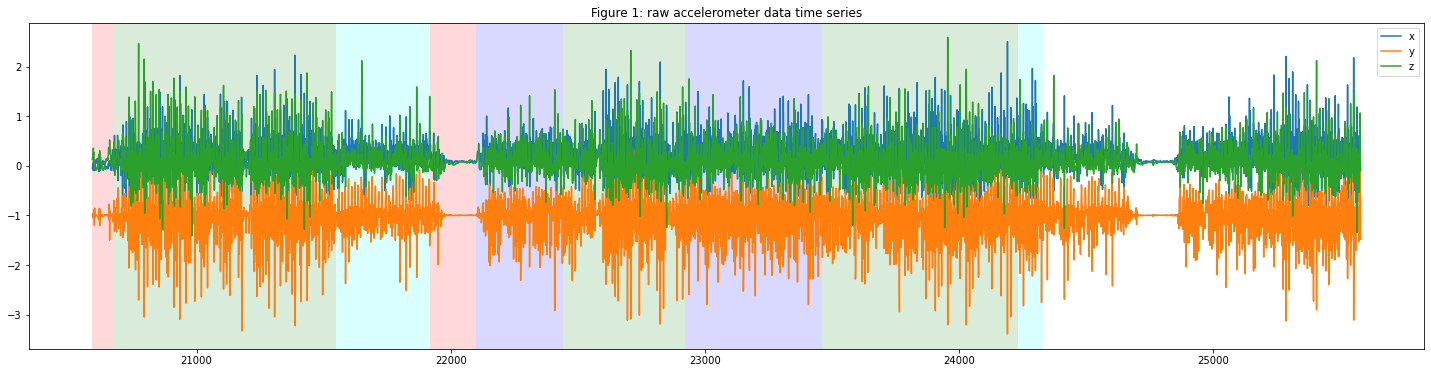

In [890]:
all_time_series = pd.concat([train_time_series[['x','y','z']], test_time_series[['x','y','z']]])
all_time_series[['x','y','z']].plot(figsize=(25,6))
plt.title('Figure 1: raw accelerometer data time series')

for i in train.index:
    activity = train['label'].loc[i]
    if(activity==1):
        color = 'red'
    elif(activity==2):
        color = 'green'
    elif(activity==3):
        color = 'blue'
    else:
        color = 'cyan'
    plt.axvspan(i, i+1, facecolor=color, alpha=.15)


In [10]:
train_labels.loc[22009]

timestamp              1565110073506
UTC time     2019-08-06T16:47:53.506
label                              1
Name: 22009, dtype: object

We can see that the flat region in figure 1 is labelled with activity 1, which is standing and hence consistent with the lack of acceleration. 

However, the negative value of the y acceleration is inconsistent, since it should be approximately zero. This observation reveals a negative bias in the y readings, hence highlighting the need for data normalistion.

In [77]:
normalised_train_time_series = (train_time_series[['x','y','z']] - train_time_series[['x','y','z']].mean())/(train_time_series[['x','y','z']].max() - train_time_series[['x','y','z']].min())
normalised_train_time_series.head()        

,x,y,z
20590,-0.069975,0.000446,0.010492
20591,-0.057902,0.010153,0.021597
20592,-0.040074,0.006179,0.037754
20593,-0.045633,-0.012910,0.043038
20594,-0.080157,0.008747,0.067920


In [78]:
normalised_train_time_series.describe()

,x,y,z
count,3.740000e+03,3.740000e+03,3.740000e+03
mean,2.374809e-18,1.139908e-17,2.374809e-19
std,1.107454e-01,1.215758e-01,8.769196e-02
min,-3.545439e-01,-6.426076e-01,-3.747207e-01
25%,-6.081024e-02,-3.855419e-02,-3.823400e-02
50%,-9.573701e-03,1.275592e-02,-8.088600e-03
75%,5.732186e-02,6.346604e-02,2.991481e-02
max,6.454561e-01,3.573924e-01,6.252793e-01


Text(0.5, 1.0, 'Figure 2: normalised accelerometer data')

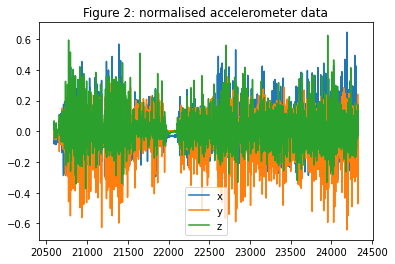

In [79]:
normalised_train_time_series.plot()
plt.title('Figure 2: normalised accelerometer data')

Figure 2 illustrates that the normalisation has rendered the three numerical features similar in magnitude and spread. The normalized data features will now work more efficiently and in an understandable way. 

In [80]:
train_time_series[['x','y','z']] = normalised_train_time_series # normalised and checked acclerometer data assigned to training data

## Examine time values

In [81]:
def utc_str_to_timestamp(time_str):
    return datetime.datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%S.%f').timestamp()

def datetime_to_seconds(datetime_value):
    return datetime_value.total_seconds()

In [82]:
# assess the time differences between datapoints
time_points = train_time_series['UTC time']
time_points.head()

20590    2019-08-06T16:45:31.188
20591    2019-08-06T16:45:31.288
20592    2019-08-06T16:45:31.388
20593    2019-08-06T16:45:31.488
20594    2019-08-06T16:45:31.589
Name: UTC time, dtype: object

In [83]:
# calculate time differences
time_points = time_points.apply(utc_str_to_timestamp)
time_diffs = time_points.diff()

In [84]:
time_diffs.describe()

count    3739.000000
mean        0.100254
std         0.001483
min         0.100000
25%         0.100000
50%         0.100000
75%         0.100000
max         0.187000
Name: UTC time, dtype: float64

The time intervals between accelerometer readings is approximately 100 ms seconds with a standard deviation of 1.5 ms. This is an acceptable 1% uncertainty in the equipment which recorded the data. Hence, due to the controlled nature of the consistent time spans, the time readings should not provide meaningful insight to the model.

We now convert the time points to float values in seconds.

In [85]:
train_time_series['UTC time'] = time_points # because now we can work with floats later on

In [86]:
train_time_series.head()

,timestamp,UTC time,x,y,z
20590,1565109931188,1.565074e+09,-0.069975,0.000446,0.010492
20591,1565109931288,1.565074e+09,-0.057902,0.010153,0.021597
20592,1565109931388,1.565074e+09,-0.040074,0.006179,0.037754
20593,1565109931488,1.565074e+09,-0.045633,-0.012910,0.043038
20594,1565109931589,1.565074e+09,-0.080157,0.008747,0.067920


## Examine spectra
Now we examine the spectra of the signals for insight into whether they could make good features. It is increasingly common for fourier analysis to play a part in financial market predictions given its powerful computational foundation and the ability to reject parts of the spectrum which are not useful.

Since we have concluded that the time measurements are roughly at 10 Hz, we can remove the UTC time and timestampt features since they will not add value to the model. 

First we must rearrange the data into the groups of 10 for which there are readings.

In [131]:
# for efficiency, the data will be constructed in a list and then formed into a dataframe
train_X = np.zeros((len(train_labels['label']), 30))
for i in range(len(train_labels['label'])):
    first_index = 10*i
    last_index = first_index + 10
    train_X[i][0:10] = train_time_series['x'].iloc[first_index:last_index].to_numpy()
    train_X[i][10:20] = train_time_series['y'].iloc[first_index:last_index].to_numpy()
    train_X[i][20:30] = train_time_series['z'].iloc[first_index:last_index].to_numpy()

In [132]:
print(train_X)

[[-0.06997491 -0.05790193 -0.04007421 ...  0.01329815  0.01100317
  -0.02131712]
 [-0.03584781 -0.06863868 -0.02416331 ... -0.03060377 -0.03115655
  -0.03029879]
 [-0.01337106 -0.0213756  -0.06782756 ...  0.03746784  0.01988953
   0.05497371]
 ...
 [ 0.42666105 -0.23459953 -0.25795999 ...  0.06475214 -0.11160655
   0.0435865 ]
 [-0.07363352  0.05452454  0.09427403 ... -0.01884678 -0.02939148
   0.05482503]
 [ 0.02512332  0.1277565  -0.03546786 ... -0.01192754 -0.00865663
  -0.01236214]]


In [133]:
train_time_series.head(10)

,timestamp,UTC time,x,y,z
20590,1565109931188,1.565074e+09,-0.069975,0.000446,0.010492
20591,1565109931288,1.565074e+09,-0.057902,0.010153,0.021597
20592,1565109931388,1.565074e+09,-0.040074,0.006179,0.037754
20593,1565109931488,1.565074e+09,-0.045633,-0.012910,0.043038
20594,1565109931589,1.565074e+09,-0.080157,0.008747,0.067920
20595,1565109931689,1.565074e+09,-0.020091,0.030901,0.034670
20596,1565109931789,1.565074e+09,-0.063751,0.029973,0.044917
20597,1565109931889,1.565074e+09,-0.082116,0.027618,0.013298
20598,1565109931989,1.565074e+09,-0.081399,-0.051872,0.011003
20599,1565109932090,1.565074e+09,-0.051020,0.041179,-0.021317


In [134]:
# create the labels for the training in the form of a numpy array
train_Y = train_labels['label'].to_numpy()

In [135]:
Fs = 10   # sampling frequency [Hz]
tstep = 1/Fs # time steps [s]
N = len(train_time_series['x']) # number of samples
T = dt*N
t = np.linspace(0,(N-1)*tstep, N)

fstep = Fs / N # frequecy intervals
f = np.linspace(0, (N-1)*fstep, N) # frequency steps
signal = train_time_series['x'].tolist()

Text(0.5, 1.0, 'x accleration')

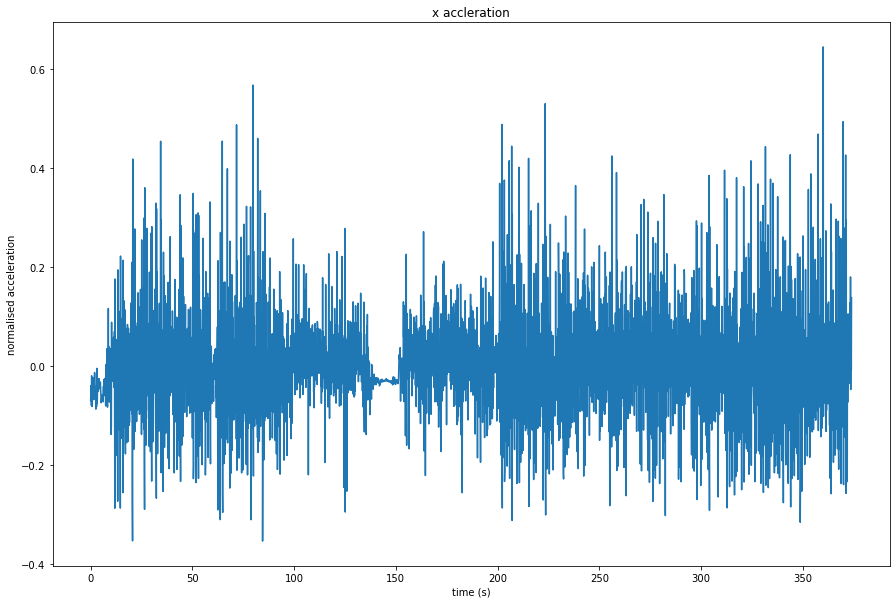

In [136]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(t,signal)
plt.xlabel('time (s)')
plt.ylabel('normalised acceleration')
plt.title('x accleration')

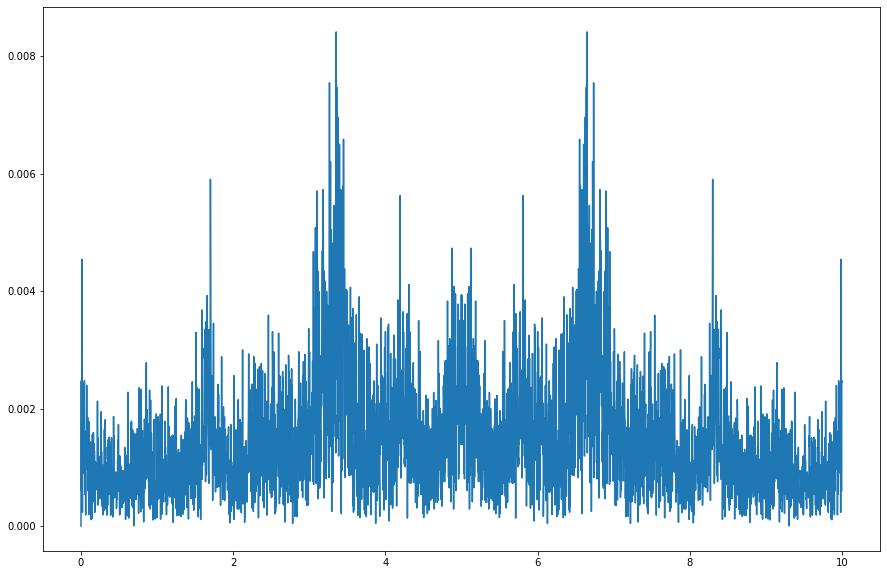

In [137]:
X = np.fft.fft(signal)
X_mag = np.abs(X)/ N

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(f,X_mag)




Rather than explore the spectrum of the entire set of readings, we can explore the spectrum for each activity.

In [152]:
# create array with all x readings in rows of 10 columns
X = np.zeros((len(train_labels['label']), 10))
for i in range(len(train_labels['label'])):
    first_index = 10*i
    last_index = first_index + 10
    X[i][0:10] = train_time_series['x'].iloc[first_index:last_index].to_numpy()

# 1 = standing
standing_X = X[train_Y == 1]

# 2 = walking
walking_X = X[train_Y == 2]

# 3 = stairs down
stairs_down_X = X[train_Y == 3]

# 4 = stairs up
stairs_up_X = X[train_Y == 4]

Text(0.5, 1.0, 'stiars up spectra')

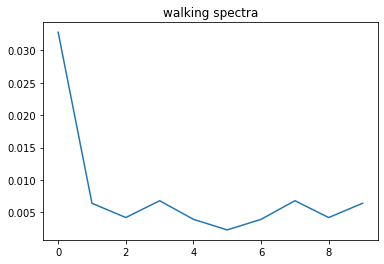

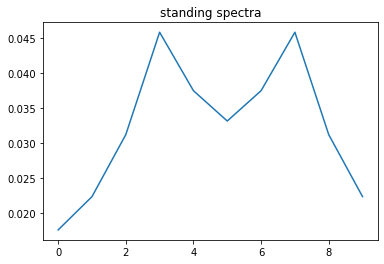

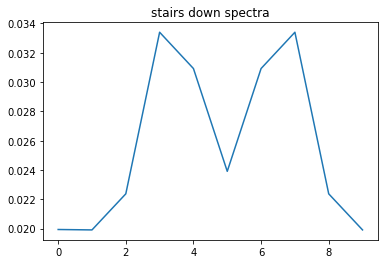

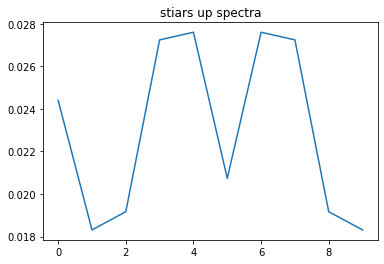

In [169]:
def plot_spectra_average(data):
    Fs = 10   # sampling frequency [Hz]
    tstep = 1/Fs # time steps [s]
    N = 10 # number of samples
    T = dt*N
    t = np.linspace(0,(N-1)*tstep, N)

    fstep = Fs / N # frequecy intervals
    f = np.linspace(0, (N-1)*fstep, N) # frequency steps
    spectra = np.zeros((data.shape[0],N))
    
    for i in range(data.shape[0]):
        signal = data[i,:]
        X = np.fft.fft(signal)
        spectra[i] = np.abs(X)/ N
    
    mean_spectra = spectra.mean(axis=0)

    fig, ax = plt.subplots()
    ax.plot(f,mean_spectra)
    
plot_spectra_average(standing_X)
plt.title('walking spectra')
plot_spectra_average(walking_X)
plt.title('standing spectra')
plot_spectra_average(stairs_down_X)
plt.title('stairs down spectra')
plot_spectra_average(stairs_up_X)
plt.title('stairs up spectra')

## Explore correlations

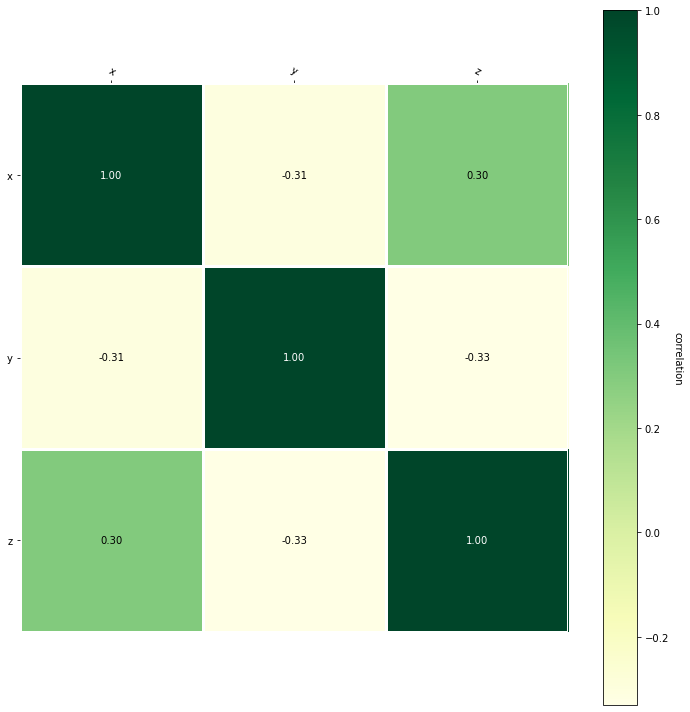

In [399]:
correlations = pd.DataFrame.corr(train_time_series)
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(correlations, train_time_series.columns, train_time_series.columns, ax=ax,
                   cmap="YlGn", cbarlabel="correlation")
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

Across all motion, xz are slighlty possitivley correlated, whereas xy and yz are slighlty negatively correlated. The following subplot displays the correlation matrix for each activity.

In [422]:
indicies = (train_labels[train_labels['label']==1]).index
standing_time_series = train_time_series.loc[indicies,:]
indicies = (train_labels[train_labels['label']==2]).index
walking_time_series = train_time_series.loc[indicies,:]
indicies = (train_labels[train_labels['label']==3]).index
stairs_down_time_series = train_time_series.loc[indicies,:]
indicies = (train_labels[train_labels['label']==4]).index
stairs_up_time_series = train_time_series.loc[indicies,:]

In [423]:
standing_correlations = pd.DataFrame.corr(standing_time_series)
walking_correlations = pd.DataFrame.corr(walking_time_series)
stairs_down_correlations = pd.DataFrame.corr(stairs_down_time_series)
stairs_up_correlations = pd.DataFrame.corr(stairs_up_time_series)

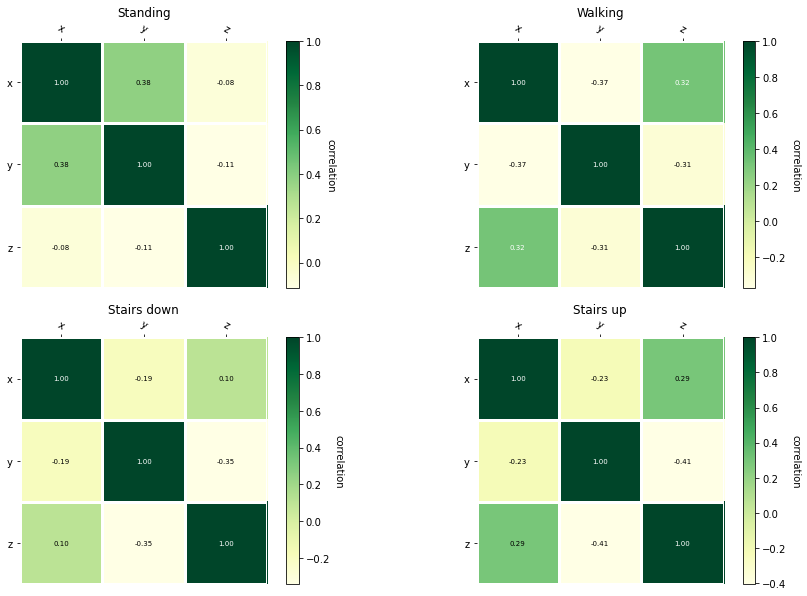

In [431]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
im, _ = heatmap(standing_correlations, standing_correlations.columns, standing_correlations.columns, ax=ax1,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

im, _ = heatmap(walking_correlations, walking_correlations.columns, walking_correlations.columns, ax=ax2,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

im, _ = heatmap(stairs_down_correlations, stairs_down_correlations.columns, stairs_down_correlations.columns, ax=ax3,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

im, _ = heatmap(stairs_up_correlations, stairs_up_correlations.columns, stairs_up_correlations.columns, ax=ax4,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

ax1.set_title('Standing')
ax2.set_title('Walking')
ax3.set_title('Stairs down')
ax4.set_title('Stairs up')

pass

We can see that standing and walking visibly differ from the rest, but both stair are more similar to each other. However, stair up and down differ most notably in their xz correlation. 

Below we look at the correlations, based on actitity, of the spherical coordinates.

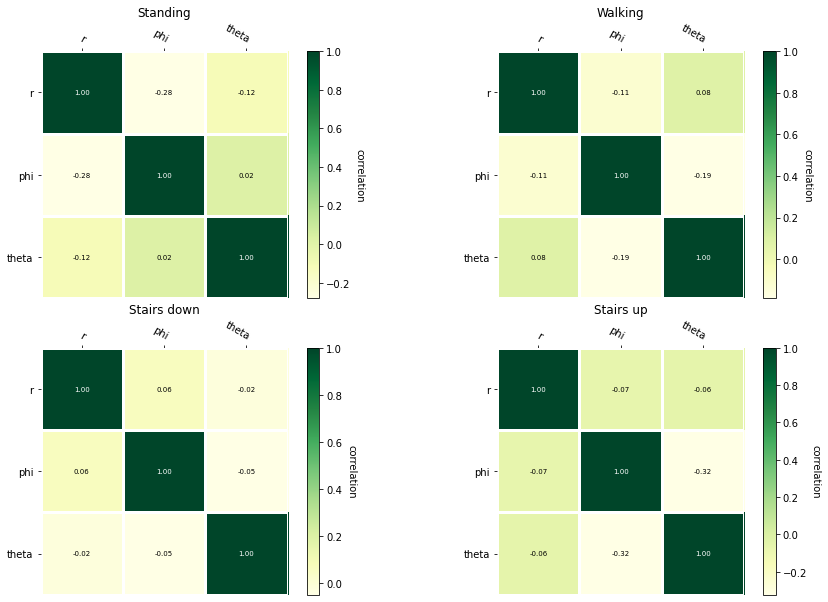

In [1121]:
train_THETA = pd.DataFrame(cart2spherical(train_time_series[['x','y','z']].to_numpy()),
                           columns = ['r','phi','theta'],
                           index = train_time_series.index)

indicies = (train_labels[train_labels['label']==1]).index
standing_time_series = train_THETA.loc[indicies,:]
indicies = (train_labels[train_labels['label']==2]).index
walking_time_series = train_THETA.loc[indicies,:]
indicies = (train_labels[train_labels['label']==3]).index
stairs_down_time_series = train_THETA.loc[indicies,:]
indicies = (train_labels[train_labels['label']==4]).index
stairs_up_time_series = train_THETA.loc[indicies,:]

standing_correlations = pd.DataFrame.corr(standing_time_series)
walking_correlations = pd.DataFrame.corr(walking_time_series)
stairs_down_correlations = pd.DataFrame.corr(stairs_down_time_series)
stairs_up_correlations = pd.DataFrame.corr(stairs_up_time_series)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
im, _ = heatmap(standing_correlations, standing_correlations.columns, standing_correlations.columns, ax=ax1,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

im, _ = heatmap(walking_correlations, walking_correlations.columns, walking_correlations.columns, ax=ax2,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

im, _ = heatmap(stairs_down_correlations, stairs_down_correlations.columns, stairs_down_correlations.columns, ax=ax3,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

im, _ = heatmap(stairs_up_correlations, stairs_up_correlations.columns, stairs_up_correlations.columns, ax=ax4,
                cmap="YlGn", cbarlabel="correlation")
annotate_heatmap(im, valfmt="{x:.2f}", size=7)

ax1.set_title('Standing')
ax2.set_title('Walking')
ax3.set_title('Stairs down')
ax4.set_title('Stairs up')

pass

# Model Selection 
<a id='ML_cell'></a>
Now that the final form of the data in it's cleaned up form is decided upon, based on the preceeding analysis, it will be pulled in again and refined to that form. The data will be used to train a selection of classifiers for comparison. 

One study [1] found that random forests were the most accurate in classifying activities froom accelerometer data. 

[1] Martin, Bryan & Addona, Vittorio & Wolfson, Julian & Adomavicius, Gediminas & Fan, Yingling. (2017). Methods for Real-Time Prediction of the Mode of Travel Using Smartphone-Based GPS and Accelerometer Data. Sensors. 17. 2058. 10.3390/s17092058. 




In [705]:
def import_and_split_data_10():
    # import data such that each group of 10 for which a label is provided is grouped into a single row
    train_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/d64e74647423e525bbeb13f2884e9cfa/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_labels.csv',index_col=0)
    train_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/b98039c3648763aae4f153a6ed32f38b/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_time_series.csv',index_col=0)
    test_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/72d5933c310cf5eac3fa3f28b26d9c39/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_labels.csv',index_col=0)
    test_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1ca4f3d4976f07b8c4ecf99cf8f7bdbc/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_time_series.csv',index_col=0)

    # remove first four entires in training set
    train_labels = train_labels.iloc[1:, :]
    train_time_series = train_time_series.iloc[4:,:]

    # pop off unecassary features
    train_time_series.pop('accuracy')
    test_time_series.pop('accuracy')

    train_time_series.pop('UTC time')
    test_time_series.pop('UTC time')

    train_time_series.pop('timestamp')
    test_time_series.pop('timestamp')

    # normalise accelerometer readings
    train_time_series[['x','y','z']] = (train_time_series[['x','y','z']] - train_time_series[['x','y','z']].mean())/(train_time_series[['x','y','z']].max() - train_time_series[['x','y','z']].min())
    test_time_series[['x','y','z']] = (test_time_series[['x','y','z']] - test_time_series[['x','y','z']].mean())/(test_time_series[['x','y','z']].max() - test_time_series[['x','y','z']].min())

    # organise into numpy array for training
    train_X = np.zeros((len(train_labels['label']), 30))
    for i in range(len(train_labels['label'])):
        first_index = 10*i
        last_index = first_index + 10
        train_X[i][0:10] = train_time_series['x'].iloc[first_index:last_index].to_numpy()
        train_X[i][10:20] = train_time_series['y'].iloc[first_index:last_index].to_numpy()
        train_X[i][20:30] = train_time_series['z'].iloc[first_index:last_index].to_numpy()

    test_X = np.zeros((len(test_labels['label']), 30))
    for i in range(len(test_labels['label'])):
        first_index = 10*i
        last_index = first_index + 10
        test_X[i][0:10] = test_time_series['x'].iloc[first_index:last_index].to_numpy()
        test_X[i][10:20] = test_time_series['y'].iloc[first_index:last_index].to_numpy()
        test_X[i][20:30] = test_time_series['z'].iloc[first_index:last_index].to_numpy()

    train_Y = train_labels['label'].to_numpy()
    test_Y = test_labels['label'].to_numpy()

    # split train_X into training and validation sets
    train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y,random_state=RANDOM_STATE)
        # use random_state=1 to have the same training/validation split across different runs
    
    return train_X, val_X, test_X, train_Y, val_Y

In [728]:
def import_and_split_data_1():
    # import data into groups of 3 and give labels according to the groups of 10
    train_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/d64e74647423e525bbeb13f2884e9cfa/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_labels.csv',index_col=0)
    train_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/b98039c3648763aae4f153a6ed32f38b/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_time_series.csv',index_col=0)
    test_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/72d5933c310cf5eac3fa3f28b26d9c39/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_labels.csv',index_col=0)
    test_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1ca4f3d4976f07b8c4ecf99cf8f7bdbc/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_time_series.csv',index_col=0)

    # remove first four entires in training set
    train_labels = train_labels.iloc[1:, :]
    train_time_series = train_time_series.iloc[4:,:]

    # pop off unecassary features
    train_time_series.pop('accuracy')
    test_time_series.pop('accuracy')

    train_time_series.pop('UTC time')
    test_time_series.pop('UTC time')

    train_time_series.pop('timestamp')
    test_time_series.pop('timestamp')

    # normalise accelerometer readings
    train_time_series[['x','y','z']] = (train_time_series[['x','y','z']] - train_time_series[['x','y','z']].mean())/(train_time_series[['x','y','z']].max() - train_time_series[['x','y','z']].min())
    test_time_series[['x','y','z']] = (test_time_series[['x','y','z']] - test_time_series[['x','y','z']].mean())/(test_time_series[['x','y','z']].max() - test_time_series[['x','y','z']].min())

    # organise into numpy array for training
    train_X = train_time_series.to_numpy()
    test_X = test_time_series.to_numpy()

    # assume change of activity cannot be instananeous and copy over label in groups of 10
    train_Y = np.zeros(train_X.shape[0])
    test_Y = np.zeros(test_X.shape[0])
    
    for i in range(len(train_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        train_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
    
    for i in range(len(test_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        test_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
    

    # split train_X into training and validation sets
    train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y,random_state=RANDOM_STATE)
        # use random_state=1 to have the same training/validation split across different runs
    
    return train_X, val_X, test_X, train_Y, val_Y

In [892]:
def import_and_split_data_3_window():
    # import data into groups of 3 and give labels according to the groups of 10
    train_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/d64e74647423e525bbeb13f2884e9cfa/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_labels.csv',index_col=0)
    train_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/b98039c3648763aae4f153a6ed32f38b/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_time_series.csv',index_col=0)
    test_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/72d5933c310cf5eac3fa3f28b26d9c39/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_labels.csv',index_col=0)
    test_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1ca4f3d4976f07b8c4ecf99cf8f7bdbc/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_time_series.csv',index_col=0)

    # remove first four entires in training set
    train_labels = train_labels.iloc[1:, :]
    train_time_series = train_time_series.iloc[4:,:]

    # pop off unecassary features
    train_time_series.pop('accuracy')
    test_time_series.pop('accuracy')

    train_time_series.pop('UTC time')
    test_time_series.pop('UTC time')

    train_time_series.pop('timestamp')
    test_time_series.pop('timestamp')

    # normalise accelerometer readings
    train_time_series[['x','y','z']] = (train_time_series[['x','y','z']] - train_time_series[['x','y','z']].mean())/(train_time_series[['x','y','z']].max() - train_time_series[['x','y','z']].min())
    test_time_series[['x','y','z']] = (test_time_series[['x','y','z']] - test_time_series[['x','y','z']].mean())/(test_time_series[['x','y','z']].max() - test_time_series[['x','y','z']].min())

    # organise into numpy array for training
    train_X = train_time_series.to_numpy()
    test_X = test_time_series.to_numpy()

    # assume change of activity cannot be instananeous and copy over label in groups of 10
    train_Y = np.zeros(train_X.shape[0])
    test_Y = np.zeros(test_X.shape[0])
    
    for i in range(len(train_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        train_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
    
    for i in range(len(test_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        test_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
        
    # copy x y z from one time step before and after
    train_X = np.concatenate((train_X[1:-1,:],train_X[0:-2],train_X[2:]),axis=1) # horizontally
    train_Y = train_Y[1:-1]
    

    # split train_X into training and validation sets
    train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y,random_state=RANDOM_STATE)
        # use random_state=1 to have the same training/validation split across different runs
    
    return train_X, val_X, test_X, train_Y, val_Y

In [893]:
def import_and_split_data_5_window():
    # import data into groups of 3 and give labels according to the groups of 10
    train_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/d64e74647423e525bbeb13f2884e9cfa/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_labels.csv',index_col=0)
    train_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/b98039c3648763aae4f153a6ed32f38b/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_time_series.csv',index_col=0)
    test_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/72d5933c310cf5eac3fa3f28b26d9c39/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_labels.csv',index_col=0)
    test_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1ca4f3d4976f07b8c4ecf99cf8f7bdbc/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_time_series.csv',index_col=0)

    # remove first four entires in training set
    train_labels = train_labels.iloc[1:, :]
    train_time_series = train_time_series.iloc[4:,:]

    # pop off unecassary features
    train_time_series.pop('accuracy')
    test_time_series.pop('accuracy')

    train_time_series.pop('UTC time')
    test_time_series.pop('UTC time')

    train_time_series.pop('timestamp')
    test_time_series.pop('timestamp')

    # normalise accelerometer readings
    train_time_series[['x','y','z']] = (train_time_series[['x','y','z']] - train_time_series[['x','y','z']].mean())/(train_time_series[['x','y','z']].max() - train_time_series[['x','y','z']].min())
    test_time_series[['x','y','z']] = (test_time_series[['x','y','z']] - test_time_series[['x','y','z']].mean())/(test_time_series[['x','y','z']].max() - test_time_series[['x','y','z']].min())

    # organise into numpy array for training
    train_X = train_time_series.to_numpy()
    test_X = test_time_series.to_numpy()

    # assume change of activity cannot be instananeous and copy over label in groups of 10
    train_Y = np.zeros(train_X.shape[0])
    test_Y = np.zeros(test_X.shape[0])
    
    for i in range(len(train_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        train_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
    
    for i in range(len(test_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        test_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
        
    # copy x y z from two time steps before and after
    train_X = np.concatenate((train_X[2:-2,:],train_X[1:-3,:],train_X[0:-4,:],train_X[3:-1,:],train_X[4:,:]),axis=1) # horizontally
    train_Y = train_Y[2:-2]
    

    # split train_X into training and validation sets
    train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y,random_state=RANDOM_STATE)
        # use random_state=1 to have the same training/validation split across different runs
    
    return train_X, val_X, test_X, train_Y, val_Y

In [957]:
def import_and_split_data_7_window():
    # import data into groups of 3 and give labels according to the groups of 10
    train_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/d64e74647423e525bbeb13f2884e9cfa/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_labels.csv',index_col=0)
    train_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/b98039c3648763aae4f153a6ed32f38b/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_time_series.csv',index_col=0)
    test_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/72d5933c310cf5eac3fa3f28b26d9c39/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_labels.csv',index_col=0)
    test_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1ca4f3d4976f07b8c4ecf99cf8f7bdbc/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_time_series.csv',index_col=0)

    # remove first four entires in training set
    train_labels = train_labels.iloc[1:, :]
    train_time_series = train_time_series.iloc[4:,:]

    # pop off unecassary features
    train_time_series.pop('accuracy')
    test_time_series.pop('accuracy')

    train_time_series.pop('UTC time')
    test_time_series.pop('UTC time')

    train_time_series.pop('timestamp')
    test_time_series.pop('timestamp')

    # normalise accelerometer readings
    train_time_series[['x','y','z']] = (train_time_series[['x','y','z']] - train_time_series[['x','y','z']].mean())/(train_time_series[['x','y','z']].max() - train_time_series[['x','y','z']].min())
    test_time_series[['x','y','z']] = (test_time_series[['x','y','z']] - test_time_series[['x','y','z']].mean())/(test_time_series[['x','y','z']].max() - test_time_series[['x','y','z']].min())

    # organise into numpy array for training
    train_X = train_time_series.to_numpy()
    test_X = test_time_series.to_numpy()

    # assume change of activity cannot be instananeous and copy over label in groups of 10
    train_Y = np.zeros(train_X.shape[0])
    test_Y = np.zeros(test_X.shape[0])
    
    for i in range(len(train_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        train_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
    
    for i in range(len(test_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        test_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
        
    # copy x y z from two time steps before and after
    train_X = np.concatenate((train_X[3:-3,:],
                              train_X[0:-6,:],
                              train_X[1:-5,:],
                              train_X[2:-4,:],
                              train_X[4:-2,:],
                              train_X[5:-1,:],
                              train_X[6:,:])
                             ,axis=1) # horizontally
    train_Y = train_Y[3:-3]
    

    # split train_X into training and validation sets
    train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y,random_state=RANDOM_STATE)
        # use random_state=1 to have the same training/validation split across different runs
    
    return train_X, val_X, test_X, train_Y, val_Y

In [982]:
def import_and_split_data_9_window():
    # import data into groups of 3 and give labels according to the groups of 10
    train_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/d64e74647423e525bbeb13f2884e9cfa/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_labels.csv',index_col=0)
    train_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/b98039c3648763aae4f153a6ed32f38b/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/train_time_series.csv',index_col=0)
    test_labels = pd.read_csv('https://courses.edx.org/assets/courseware/v1/72d5933c310cf5eac3fa3f28b26d9c39/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_labels.csv',index_col=0)
    test_time_series = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1ca4f3d4976f07b8c4ecf99cf8f7bdbc/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/test_time_series.csv',index_col=0)

    # remove first four entires in training set
    train_labels = train_labels.iloc[1:, :]
    train_time_series = train_time_series.iloc[4:,:]

    # pop off unecassary features
    train_time_series.pop('accuracy')
    test_time_series.pop('accuracy')

    train_time_series.pop('UTC time')
    test_time_series.pop('UTC time')

    train_time_series.pop('timestamp')
    test_time_series.pop('timestamp')

    # normalise accelerometer readings
    train_time_series[['x','y','z']] = (train_time_series[['x','y','z']] - train_time_series[['x','y','z']].mean())/(train_time_series[['x','y','z']].max() - train_time_series[['x','y','z']].min())
    test_time_series[['x','y','z']] = (test_time_series[['x','y','z']] - test_time_series[['x','y','z']].mean())/(test_time_series[['x','y','z']].max() - test_time_series[['x','y','z']].min())

    # organise into numpy array for training
    train_X = train_time_series.to_numpy()
    test_X = test_time_series.to_numpy()

    # assume change of activity cannot be instananeous and copy over label in groups of 10
    train_Y = np.zeros(train_X.shape[0])
    test_Y = np.zeros(test_X.shape[0])
    
    for i in range(len(train_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        train_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
    
    for i in range(len(test_labels['label'])):
        first_index = i*10
        second_index = first_index+10
        test_Y[first_index:second_index] = np.ones(10) * (train_labels['label'].iloc[i])
        
    # copy x y z from two time steps before and after
    train_X = np.concatenate((train_X[4:-4,:],
                              train_X[0:-8,:],
                              train_X[1:-7,:],
                              train_X[2:-6,:],
                              train_X[3:-5,:],
                              train_X[5:-3,:],
                              train_X[6:-2,:],
                              train_X[7:-1,:],
                              train_X[8:,:])
                             ,axis=1) # horizontally
    train_Y = train_Y[4:-4]
    

    # split train_X into training and validation sets
    train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y,random_state=RANDOM_STATE)
        # use random_state=1 to have the same training/validation split across different runs
    
    return train_X, val_X, test_X, train_Y, val_Y

### Run to import data

In [751]:
# runs poorly because data squished into groups of 10, resulting in many less training examples

RANDOM_STATE = 1
train_X, val_X, test_X, train_Y, val_Y = import_and_split_data_10()
X = np.concatenate((train_X,val_X),axis=0)
Y = np.concatenate((train_Y,val_Y),axis=0)

In [1079]:
RANDOM_STATE = 1
train_X, val_X, test_X, train_Y, val_Y = import_and_split_data_1()
X = np.concatenate((train_X,val_X),axis=0)
Y = np.concatenate((train_Y,val_Y),axis=0)

In [947]:
RANDOM_STATE = 1
train_X, val_X, test_X, train_Y, val_Y = import_and_split_data_3_window()
X = np.concatenate((train_X,val_X),axis=0)
Y = np.concatenate((train_Y,val_Y),axis=0)

In [1057]:
RANDOM_STATE = 1
train_X, val_X, test_X, train_Y, val_Y = import_and_split_data_5_window()
X = np.concatenate((train_X,val_X),axis=0)
Y = np.concatenate((train_Y,val_Y),axis=0)

In [1034]:
RANDOM_STATE = 1
train_X, val_X, test_X, train_Y, val_Y = import_and_split_data_7_window()
X = np.concatenate((train_X,val_X),axis=0)
Y = np.concatenate((train_Y,val_Y),axis=0)

In [1123]:
RANDOM_STATE = 1
train_X, val_X, test_X, train_Y, val_Y = import_and_split_data_9_window()
X = np.concatenate((train_X,val_X),axis=0)
Y = np.concatenate((train_Y,val_Y),axis=0)

In [1056]:
print(train_X.shape)

(2800, 21)


In [1080]:
# change to spherical to perform better between stairs up and down
window_size = 1
for i in range(window_size):
    train_X[i*3:(i*3 +3)] = cart2spherical(train_X[i*3:(i*3 +3)])
    val_X[i*3:(i*3 +3)] = cart2spherical(val_X[i*3:(i*3 +3)])
    test_X[i*3:(i*3 +3)] = cart2spherical(test_X[i*3:(i*3 +3)])

### Packages


In [1081]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import pickle
from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 1

## Logistic regression

In [1082]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(train_X, train_Y)
lr_predict_Y = lr_model.predict(val_X)

In [1083]:
# print training and validation accuracy - gauge is bias/varaince
lr_accuracy = accuracy_score(val_Y, lr_predict_Y)
print("The validation accuracy for logistic regression is: %.4f" % (lr_accuracy))
lr_training_predict_Y = lr_model.predict(train_X)
lr_training_accuracy = accuracy_score(train_Y, lr_training_predict_Y)
print("The training accuracy for logistic regression is: %.4f" % (lr_training_accuracy))

# print precision
lr_precision = precision_score(val_Y, lr_predict_Y,average=None)
print("The precision for each class using logistic regression is:")
print(lr_precision)

# print recall
lr_recall = recall_score(val_Y, lr_predict_Y,average=None)
print("The recall for each class using logistic regression is:")
print(lr_recall)

# print f1 score 
lr_f1_score = f1_score(val_Y, lr_predict_Y,average=None)
print("The f1 scores for logistic regression are: ")
print(lr_f1_score)

# row is true value, column is predicted value
print("The confusion matrix for the logistic regression model is:")
lr_confusion_matrix = confusion_matrix(val_Y, lr_predict_Y)
print(lr_confusion_matrix)

num_each_class = np.sum(lr_confusion_matrix,axis=1)
num_predicted_correct = np.diagonal(lr_confusion_matrix)
lr_accuracy_classes = num_predicted_correct / num_each_class * 100
print("The accuracy for each class is:")
print(lr_accuracy_classes)

print("The cross validation score, using 5-fold validation, is: ")
lr_model_blank = LogisticRegression()
print(cross_val_score(lr_model_blank, X, Y, cv=5)) 

The validation accuracy for logistic regression is: 0.5679
The training accuracy for logistic regression is: 0.5701
The precision for each class using logistic regression is:
[0.         0.56852248 0.         0.        ]
The recall for each class using logistic regression is:
[0. 1. 0. 0.]
The f1 scores for logistic regression are: 
[0.         0.72491468 0.         0.        ]
The confusion matrix for the logistic regression model is:
[[  0  65   0   0]
 [  0 531   0   0]
 [  0 216   0   0]
 [  0 122   1   0]]
The accuracy for each class is:
[  0. 100.   0.   0.]
The cross validation score, using 5-fold validation, is: 


/Users/rad/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.56951872 0.56951872 0.56951872 0.56951872 0.56951872]


## Naive Bayes

In [1084]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(train_X,train_Y)
nb_predict_Y = nb_model.predict(val_X)

In [1085]:
# print training and validation accuracy - gauge is bias/varaince
nb_accuracy = accuracy_score(val_Y, nb_predict_Y)
print("The validation accuracy for Naive Bayes is: %.4f" % (nb_accuracy))
nb_training_predict_Y = nb_model.predict(train_X)
nb_training_accuracy = accuracy_score(train_Y, nb_training_predict_Y)
print("The training accuracy for Naive Bayes is: %.4f" % (nb_training_accuracy))

# print precision
nb_precision = precision_score(val_Y, nb_predict_Y,average=None)
print("The precision for each class using Naive Bayes is:")
print(nb_precision)

# print recall
nb_recall = recall_score(val_Y, nb_predict_Y,average=None)
print("The recall for each class using Naive Bayes is:")
print(nb_recall)

# print f1 score 
nb_f1_score = f1_score(val_Y, nb_predict_Y,average=None)
print("The f1 scores for Naive Bayes are: ")
print(nb_f1_score)

# row is true value, column is predicted value
print("The confusion matrix for the Naive Bayes model is:")
nb_confusion_matrix = confusion_matrix(val_Y, nb_predict_Y)
print(nb_confusion_matrix)

num_each_class = np.sum(nb_confusion_matrix,axis=1)
num_predicted_correct = np.diagonal(nb_confusion_matrix)
nb_accuracy_classes = num_predicted_correct / num_each_class * 100
print("The accuracy for each class is:")
print(nb_accuracy_classes)

print("The cross validation score, using 5-fold validation, is: ")
nb_model_blank = GaussianNB()
print(cross_val_score(nb_model_blank, X, Y, cv=5)) 

The validation accuracy for Naive Bayes is: 0.4888
The training accuracy for Naive Bayes is: 0.4777
The precision for each class using Naive Bayes is:
[0.28436019 0.67219917 0.30165289 0.        ]
The recall for each class using Naive Bayes is:
[0.92307692 0.61016949 0.33796296 0.        ]
The f1 scores for Naive Bayes are: 
[0.43478261 0.63968411 0.31877729 0.        ]
The confusion matrix for the Naive Bayes model is:
[[ 60   3   2   0]
 [ 89 324 118   0]
 [ 35 108  73   0]
 [ 27  47  49   0]]
The accuracy for each class is:
[92.30769231 61.01694915 33.7962963   0.        ]
The cross validation score, using 5-fold validation, is: 
[0.53743316 0.56283422 0.55080214 0.55882353 0.53208556]


/Users/rad/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Stochasitc gradient descent

In [1086]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=RANDOM_STATE)
sgd_model.fit(train_X,train_Y)
sgd_predict_Y = sgd_model.predict(val_X)

In [1087]:
# print training and validation accuracy - gauge is bias/varaince
sgd_accuracy = accuracy_score(val_Y, sgd_predict_Y)
print("The validation accuracy for stochastic gradient descent is: %.4f" % (sgd_accuracy))
sgd_training_predict_Y = sgd_model.predict(train_X)
sgd_training_accuracy = accuracy_score(train_Y, sgd_training_predict_Y)
print("The training accuracy for stochastic gradient descent is: %.4f" % (sgd_training_accuracy))

# print precision
sgd_precision = precision_score(val_Y, sgd_predict_Y,average=None)
print("The precision for each class using stochastic gradient descent is:")
print(sgd_precision)

# print recall
sgd_recall = recall_score(val_Y, sgd_predict_Y,average=None)
print("The recall for each class using stochastic gradient descent is:")
print(sgd_recall)

# print f1 score 
sgd_f1_score = f1_score(val_Y, sgd_predict_Y,average=None)
print("The f1 scores for stochastic gradient descent are: ")
print(sgd_f1_score)

# row is true value, column is predicted value
print("The confusion matrix for the stochastic gradient descent model is:")
sgd_confusion_matrix = confusion_matrix(val_Y, sgd_predict_Y)
print(sgd_confusion_matrix)

num_each_class = np.sum(sgd_confusion_matrix,axis=1)
num_predicted_correct = np.diagonal(sgd_confusion_matrix)
sgd_accuracy_classes = num_predicted_correct / num_each_class * 100
print("The accuracy for each class is:")
print(sgd_accuracy_classes)

print("The cross validation score, using 5-fold validation, is: ")
sgd_model_blank = SGDClassifier(random_state=RANDOM_STATE)
print(cross_val_score(sgd_model_blank, X, Y, cv=5)) 

The validation accuracy for stochastic gradient descent is: 0.5679
The training accuracy for stochastic gradient descent is: 0.5701
The precision for each class using stochastic gradient descent is:
[0.         0.56791444 0.         0.        ]
The recall for each class using stochastic gradient descent is:
[0. 1. 0. 0.]
The f1 scores for stochastic gradient descent are: 
[0.         0.72442019 0.         0.        ]
The confusion matrix for the stochastic gradient descent model is:
[[  0  65   0   0]
 [  0 531   0   0]
 [  0 216   0   0]
 [  0 123   0   0]]
The accuracy for each class is:
[  0. 100.   0.   0.]
The cross validation score, using 5-fold validation, is: 
[0.56951872 0.56951872 0.56951872 0.56951872 0.56951872]


/Users/rad/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision tree

In [1088]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_X,train_Y)
dt_predict_Y = dt_model.predict(val_X)

In [1089]:
# print training and validation accuracy - gauge is bias/varaince
dt_accuracy = accuracy_score(val_Y, dt_predict_Y)
print("The validation accuracy for decision tree is: %.4f" % (dt_accuracy))
dt_training_predict_Y = dt_model.predict(train_X)
dt_training_accuracy = accuracy_score(train_Y, dt_training_predict_Y)
print("The training accuracy for decision tree is: %.4f" % (dt_training_accuracy))

# print precision
dt_precision = precision_score(val_Y, dt_predict_Y,average=None)
print("The precision for each class using decision tree is:")
print(dt_precision)

# print recall
dt_recall = recall_score(val_Y, dt_predict_Y,average=None)
print("The recall for each class using decision tree is:")
print(dt_recall)

# print f1 score 
dt_f1_score = f1_score(val_Y, dt_predict_Y,average=None)
print("The f1 scores for decision tree are: ")
print(dt_f1_score)

# row is true value, column is predicted value
print("The confusion matrix for the decision tree model is:")
dt_confusion_matrix = confusion_matrix(val_Y, dt_predict_Y)
print(dt_confusion_matrix)

num_each_class = np.sum(dt_confusion_matrix,axis=1)
num_predicted_correct = np.diagonal(dt_confusion_matrix)
dt_accuracy_classes = num_predicted_correct / num_each_class * 100
print("The accuracy for each class is:")
print(dt_accuracy_classes)

print("The cross validation score, using 5-fold validation, is: ")
dt_model_blank = DecisionTreeClassifier()
print(cross_val_score(dt_model_blank, X, Y, cv=5)) 

The validation accuracy for decision tree is: 0.5102
The training accuracy for decision tree is: 1.0000
The precision for each class using decision tree is:
[0.61333333 0.64378479 0.27962085 0.22727273]
The recall for each class using decision tree is:
[0.70769231 0.65348399 0.27314815 0.20325203]
The f1 scores for decision tree are: 
[0.65714286 0.64859813 0.2763466  0.21459227]
The confusion matrix for the decision tree model is:
[[ 46   8   8   3]
 [ 11 347 118  55]
 [  8 122  59  27]
 [ 10  62  26  25]]
The accuracy for each class is:
[70.76923077 65.34839925 27.31481481 20.32520325]
The cross validation score, using 5-fold validation, is: 
[0.50935829 0.45187166 0.47058824 0.51737968 0.51604278]


## kNN

### Grid search 

In [1090]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,2,4,8,16,32,64),
    'p': (1,2),
    'weights': ('uniform', 'distance')}
                   
# with GridSearch
knn_grid_search = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
    
#Documentation of tuneable parameters:
#class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', 
#                                             algorithm='auto', leaf_size=30, p=2, 
#                                             metric='minkowski', metric_params=None, 
#                                             n_jobs=None, **kwargs)

knn_grid_search.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': (1, 2, 4, 8, 16, 32, 64), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [1091]:
print(knn_grid_search.best_params_)

# p = 2: corresponds to euclidean distance

{'n_neighbors': 32, 'p': 2, 'weights': 'uniform'}


In [1092]:
print(knn_grid_search.best_score_)

0.6199643493761141


### Best knn model

In [1093]:
# use the k neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 32, p=2, weights='uniform')
knn_model.fit(train_X,train_Y)
knn_predict_Y = knn_model.predict(val_X)


# print training and validation accuracy - gauge is bias/varaince
knn_accuracy = accuracy_score(val_Y, knn_predict_Y)
print("The validation accuracy for kNN is: %.4f" % (knn_accuracy))
knn_training_predict_Y = knn_model.predict(train_X)
knn_training_accuracy = accuracy_score(train_Y, knn_training_predict_Y)
print("The training accuracy for kNN is: %.4f" % (knn_training_accuracy))

# print precision
knn_precision = precision_score(val_Y, knn_predict_Y,average=None)
print("The precision for each class using kNN is:")
print(knn_precision)

# print recall
knn_recall = recall_score(val_Y, knn_predict_Y,average=None)
print("The recall for each class using kNN is:")
print(knn_recall)

# print f1 score 
knn_f1_score = f1_score(val_Y, knn_predict_Y,average=None)
print("The f1 scores for kNN are: ")
print(knn_f1_score)

# row is true value, column is predicted value
print("The confusion matrix for the kNN model is:")
knn_confusion_matrix = confusion_matrix(val_Y, knn_predict_Y)
print(knn_confusion_matrix)

num_each_class = np.sum(knn_confusion_matrix,axis=1)
num_predicted_correct = np.diagonal(knn_confusion_matrix)
knn_accuracy_classes = num_predicted_correct / num_each_class * 100
print("The accuracy for each class is:")
print(knn_accuracy_classes)

print("The cross validation score, using 5-fold validation, is: ")
knn_model_blank = KNeighborsClassifier(n_neighbors = 32, p=2, weights='uniform')
print(cross_val_score(knn_model_blank, X, Y, cv=5)) 

The validation accuracy for kNN is: 0.6257
The training accuracy for kNN is: 0.6314
The precision for each class using kNN is:
[0.65333333 0.6410596  0.51807229 0.40909091]
The recall for each class using kNN is:
[0.75384615 0.91148776 0.19907407 0.07317073]
The f1 scores for kNN are: 
[0.7        0.75272162 0.28762542 0.12413793]
The confusion matrix for the kNN model is:
[[ 49  13   3   0]
 [ 16 484  23   8]
 [  8 160  43   5]
 [  2  98  14   9]]
The accuracy for each class is:
[75.38461538 91.14877589 19.90740741  7.31707317]
The cross validation score, using 5-fold validation, is: 
[0.61764706 0.61631016 0.60427807 0.62299465 0.62566845]


## Random forest 
Uses an ensemble of decision trees trained on bootsrapped sub-samples of the training set. It has the advantage over a single decision tree in that it will reduce over fitting (lower variance). 

In [1125]:
from sklearn.ensemble import RandomForestClassifier
# grid search optimised
# rf_model = RandomForestClassifier(bootstrap=False,
#                                   max_depth=None, 
#                                   max_features='auto',
#                                   n_estimators = 50,
#                                   random_state = RANDOM_STATE) # use consistent seed

# default
rf_model = RandomForestClassifier(oob_score=True, random_state=RANDOM_STATE)

rf_model.fit(train_X, train_Y)
rf_predict_Y = rf_model.predict(val_X)

In [1126]:
(rf_predict_Y == val_Y).mean()

0.7909967845659164

During the construction of a random forest, a portion of the data will not be selected as part of the random samples in the bootstrapping process. These data points are denoted **out-of-bag samples**. We can use these points to determine the out-of-bag error, similar to a validation error score. The oob error is displayed below.

In [1127]:
rf_model.oob_score_ # cannot be calculated if bootstrap is off

0.773490532332976

In [1128]:
# print training and validation accuracy - gauge is bias/varaince
rf_accuracy = accuracy_score(val_Y, rf_predict_Y)
print("The validation accuracy for random forest is: %.4f" % (rf_accuracy))
rf_training_predict_Y = rf_model.predict(train_X)
rf_training_accuracy = accuracy_score(train_Y, rf_training_predict_Y)
print("The training accuracy for random forest is: %.4f" % (rf_training_accuracy))

# print precision
rf_precision = precision_score(val_Y, rf_predict_Y,average=None)
print("The precision for each class using random forest is:")
print(rf_precision)

# print recall
rf_recall = recall_score(val_Y, rf_predict_Y,average=None)
print("The recall for each class using random forest is:")
print(rf_recall)

# print f1 score 
rf_f1_score = f1_score(val_Y, rf_predict_Y,average=None)
print("The f1 scores for random forest are: ")
print(rf_f1_score)

# row is true value, column is predicted value
print("The confusion matrix for the random forest model is:")
rf_confusion_matrix = confusion_matrix(val_Y, rf_predict_Y)
print(rf_confusion_matrix)

num_each_class = np.sum(rf_confusion_matrix,axis=1)
num_predicted_correct = np.diagonal(rf_confusion_matrix)
rf_accuracy_classes = num_predicted_correct / num_each_class * 100
print("The accuracy for each class is:")
print(rf_accuracy_classes)

print("The cross validation score, using 5-fold validation, is: ")
rf_model_blank = RandomForestClassifier(oob_score=True, random_state = RANDOM_STATE)
rf_cross_val_score = cross_val_score(rf_model_blank, X, Y, cv=5)
print(rf_cross_val_score) 
print('with a mean of %f' % (rf_cross_val_score.mean()))

The validation accuracy for random forest is: 0.7910
The training accuracy for random forest is: 1.0000
The precision for each class using random forest is:
[0.98076923 0.75620438 0.82258065 0.93055556]
The recall for each class using random forest is:
[0.796875   0.95748614 0.49275362 0.55371901]
The f1 scores for random forest are: 
[0.87931034 0.84502447 0.6163142  0.69430052]
The confusion matrix for the random forest model is:
[[ 51  12   1   0]
 [  0 518  21   2]
 [  1 101 102   3]
 [  0  54   0  67]]
The accuracy for each class is:
[79.6875     95.74861368 49.27536232 55.37190083]
The cross validation score, using 5-fold validation, is: 
[0.78447122 0.7751004  0.79356568 0.80160858 0.78820375]
with a mean of 0.788590


In [1141]:
# save best model
pickle.dump(rf_model, open('rf_model.pkl','wb'))

## Support vector machine 

In [1098]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(train_X, train_Y)
svm_predict_Y = svm_model.predict(val_X)

In [1099]:
# print training and validation accuracy - gauge is bias/varaince
svm_accuracy = accuracy_score(val_Y, svm_predict_Y)
print("The validation accuracy for support vector machine is: %.4f" % (svm_accuracy))
svm_training_predict_Y = svm_model.predict(train_X)
svm_training_accuracy = accuracy_score(train_Y, svm_training_predict_Y)
print("The training accuracy for support vector machine is: %.4f" % (svm_training_accuracy))

# print precision
svm_precision = precision_score(val_Y, svm_predict_Y,average=None)
print("The precision for each class using support vector machine is:")
print(svm_precision)

# print recall
svm_recall = recall_score(val_Y, svm_predict_Y,average=None)
print("The recall for each class using support vector machine is:")
print(svm_recall)

# print f1 score 
svm_f1_score = f1_score(val_Y, svm_predict_Y,average=None)
print("The f1 scores for support vector machine are: ")
print(svm_f1_score)

# row is true value, column is predicted value
print("The confusion matrix for the support vector machine model is:")
svm_confusion_matrix = confusion_matrix(val_Y, svm_predict_Y)
print(svm_confusion_matrix)

num_each_class = np.sum(svm_confusion_matrix,axis=1)
num_predicted_correct = np.diagonal(svm_confusion_matrix)
svm_accuracy_classes = num_predicted_correct / num_each_class * 100
print("The accuracy for each class is:")
print(svm_accuracy_classes)

print("The cross validation score, using 5-fold validation, is: ")
svm_model_blank = SVC(kernel='linear')
print(cross_val_score(svm_model_blank, X, Y, cv=5)) 

The validation accuracy for support vector machine is: 0.5679
The training accuracy for support vector machine is: 0.5701
The precision for each class using support vector machine is:
[0.         0.56791444 0.         0.        ]
The recall for each class using support vector machine is:
[0. 1. 0. 0.]
The f1 scores for support vector machine are: 
[0.         0.72442019 0.         0.        ]
The confusion matrix for the support vector machine model is:
[[  0  65   0   0]
 [  0 531   0   0]
 [  0 216   0   0]
 [  0 123   0   0]]
The accuracy for each class is:
[  0. 100.   0.   0.]
The cross validation score, using 5-fold validation, is: 


/Users/rad/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.56951872 0.56951872 0.56951872 0.56951872 0.56951872]


# Model comparison

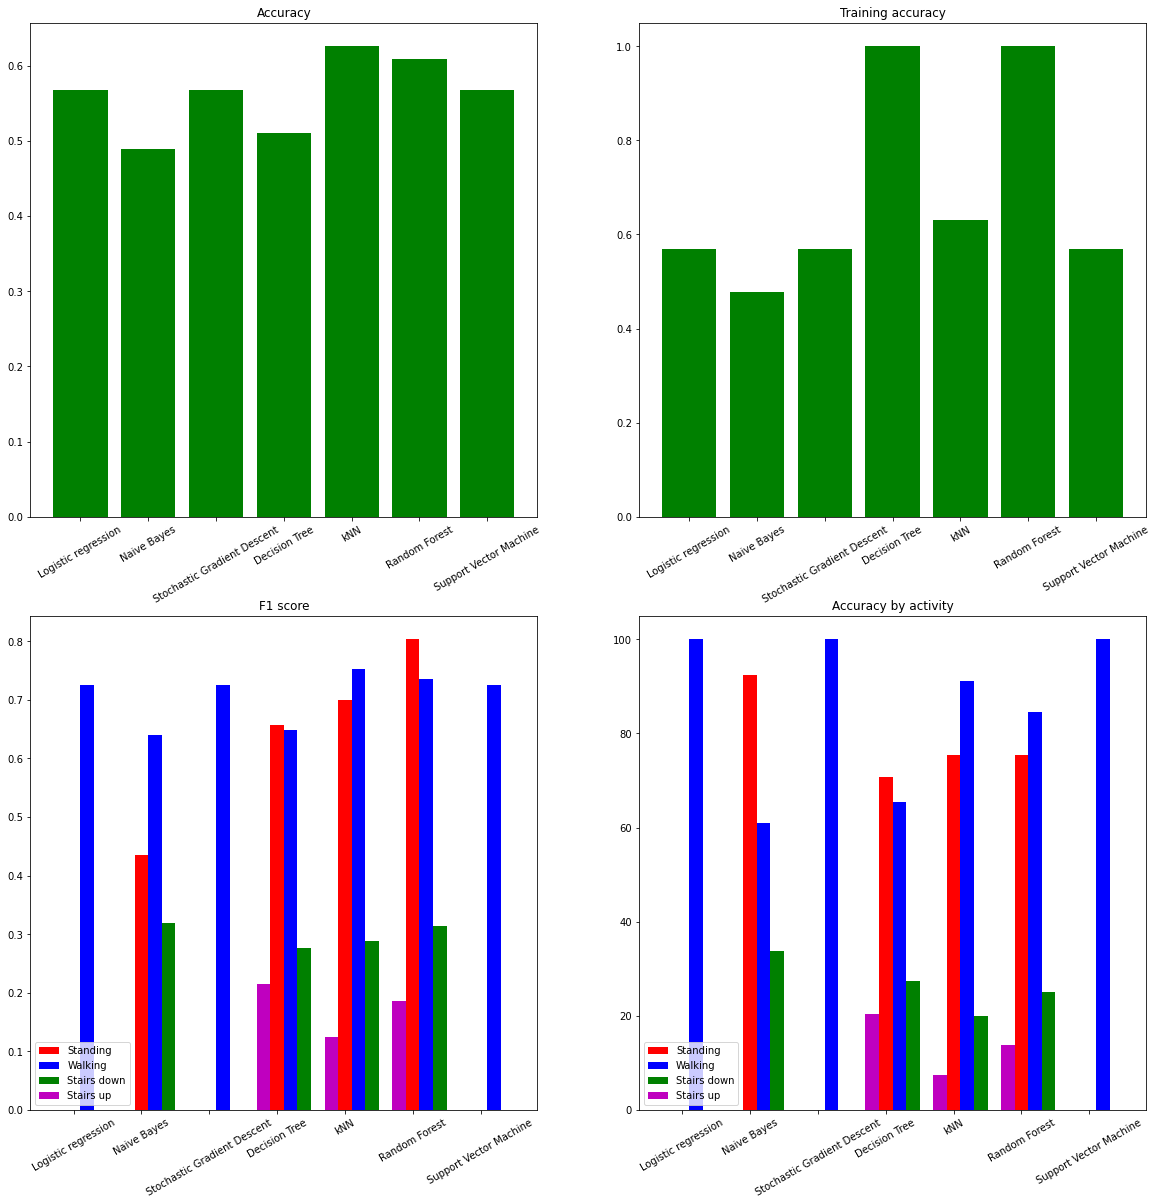

In [1100]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20))
models = ['Logistic regression', 'Naive Bayes', 'Stochastic Gradient Descent', 'Decision Tree', 'kNN','Random Forest','Support Vector Machine']
accuracy = [lr_accuracy, nb_accuracy, sgd_accuracy, dt_accuracy, knn_accuracy, rf_accuracy, svm_accuracy]
training_accuracy = [lr_training_accuracy, nb_training_accuracy, sgd_training_accuracy, dt_training_accuracy, knn_training_accuracy, rf_training_accuracy, svm_training_accuracy]
f1_score_results = np.array([lr_f1_score, nb_f1_score, sgd_f1_score, dt_f1_score, knn_f1_score, rf_f1_score, svm_f1_score])
accuracy_classes = np.array([lr_accuracy_classes, nb_accuracy_classes, sgd_accuracy_classes, dt_accuracy_classes, knn_accuracy_classes, rf_accuracy_classes, svm_accuracy_classes])


ax1.bar(range(len(models)), accuracy,tick_label=models,color='g')
ax1.set_xticks(range(len(models)), models, rotation=30)
ax1.set_title('Accuracy')

ax2.bar(range(len(models)), training_accuracy,tick_label=models,color='g')
ax2.set_xticks(range(len(models)), models, rotation=30)
ax2.set_title('Training accuracy')

ax3.bar(np.arange(len(models)), f1_score_results[:,0],tick_label=models,color='r', width=0.2)
ax3.bar(np.arange(len(models)) + 0.2 , f1_score_results[:,1],tick_label=models,color='b', width=0.2)
ax3.bar(np.arange(len(models)) + 0.4, f1_score_results[:,2],tick_label=models,color='g', width=0.2)
ax3.bar(np.arange(len(models)) - 0.2 , f1_score_results[:,3],tick_label=models,color='m', width=0.2)
ax3.legend(labels=['Standing', 'Walking','Stairs down', 'Stairs up'],loc='lower left')
ax3.set_xticks(range(len(models)), models, rotation=30)
ax3.set_title('F1 score')

ax4.bar(np.arange(len(models)), accuracy_classes[:,0],tick_label=models,color='r', width=0.2)
ax4.bar(np.arange(len(models)) + 0.2 , accuracy_classes[:,1],tick_label=models,color='b', width=0.2)
ax4.bar(np.arange(len(models)) + 0.4, accuracy_classes[:,2],tick_label=models,color='g', width=0.2)
ax4.bar(np.arange(len(models)) - 0.2 , accuracy_classes[:,3],tick_label=models,color='m', width=0.2)
ax4.set_xticks(range(len(models)), models, rotation=30)
ax4.legend(labels=['Standing', 'Walking','Stairs down', 'Stairs up'],loc='lower left')
ax4.set_title('Accuracy by activity')

#plt.savefig('result_subplot_3.pdf')
#plt.savefig('result_subplot_30.pdf')
#plt.savefig('result_subplot_3_window.pdf')
#plt.savefig('result_subplot_5_window.pdf')
#plt.savefig('result_subplot_7_window.pdf')
#plt.savefig('result_subplot_9_window.pdf')

plt.savefig('result_subplot_3_spherical.pdf')
#plt.savefig('result_subplot_3_window_spherical.pdf')
#plt.savefig('result_subplot_5_window_spherical.pdf')
#plt.savefig('result_subplot_7_window_spherical.pdf')
#plt.savefig('result_subplot_9_window_spherical.pdf')

# Tuning random forest
We can see above that the random forst was the most accurate overall, along with possessing a balanced performance when considering f1 scores and accuracy by activity. Therefore, we shall aim to tune the random forest to its most optimal setting.

In [785]:
estimator_rf = RandomForestClassifier(random_state = RANDOM_STATE)
max_depth.append(None)
parameters_rf = {'n_estimators': [10,50,100,500,1000],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [None, 10, 50, 100],
               'bootstrap': [True, False]}              # parameter search includes defuault values
                   
# with GridSearch
rf_grid_search = GridSearchCV(
    estimator=estimator_rf,
    param_grid=parameters_rf,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5 
)
    
#Documentation of tuneable parameters:
#class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', 
#                                             algorithm='auto', leaf_size=30, p=2, 
#                                             metric='minkowski', metric_params=None, 
#                                             n_jobs=None, **kwargs)

rf_grid_search.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='accuracy')

In [786]:
rf_grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 50}

In [788]:
print(rf_grid_search.best_score_)

0.6392857142857142


### Tuning conclusion
The grid search returned a collection of parameters which result in a lower accuray than for the model trained using default parameters. This may not be a significant decrease for the small dataset available. Therefore, the grid search does not provide a meaningful conclusion.

# Auxiliary functions

Taken from the matplot lib documentation examples (https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html)

In [26]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [813]:
def utc_str_to_timestamp(time_str):
    return datetime.datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%S.%f').timestamp()

def datetime_to_seconds(datetime_value):
    return datetime_value.total_seconds()

In [1009]:
# modified from source: https://stackoverflow.com/questions/4116658/faster-numpy-cartesian-to-spherical-coordinate-conversion
def cart2spherical(xyz):
    ptsnew = np.zeros(xyz.shape)
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,0] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,1] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    ptsnew[:,2] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew